In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xs = np.loadtxt("old_faithful.txt")

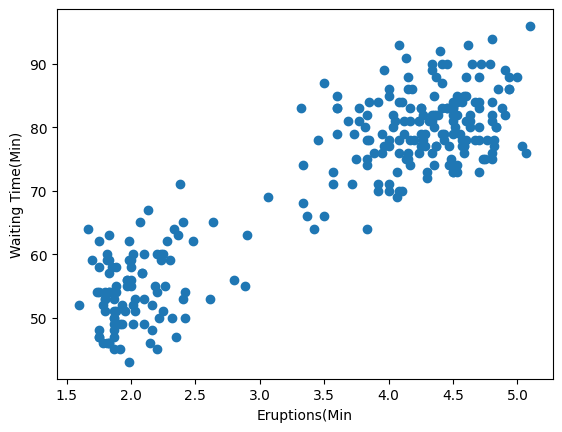

In [6]:
plt.scatter(xs[:, 0], xs[:, 1])
plt.xlabel("Eruptions(Min")
plt.ylabel("Waiting Time(Min)")
plt.show()

In [2]:
mus = np.array([[2.0, 54.50],
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44],
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.00 ]]])
# 2つの正規分布の混合比率
phis = np.array([0.35, 0.65])

def sample():
    # zは0か1のどちらかをphisの確率で選ぶ
    z = np.random.choice(2, p=phis)
    mu, cov = mus[z], covs[z]
    return np.random.multivariate_normal(mu, cov)

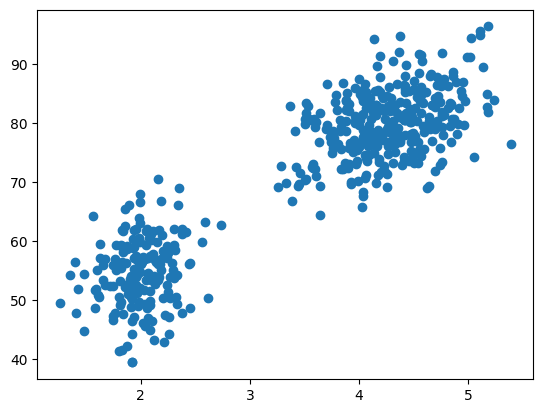

In [4]:
N = 500
xs = np.zeros((N, 2))
for i in range(N):
    xs[i] = sample()
    
plt.scatter(xs[:, 0], xs[:, 1])
plt.show()

In [39]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        # y += phi * (x @ np.random.multivariate_normal(mu, cov))
        y += phi * multivariate_normal(x, mu, cov) 
        
    return y

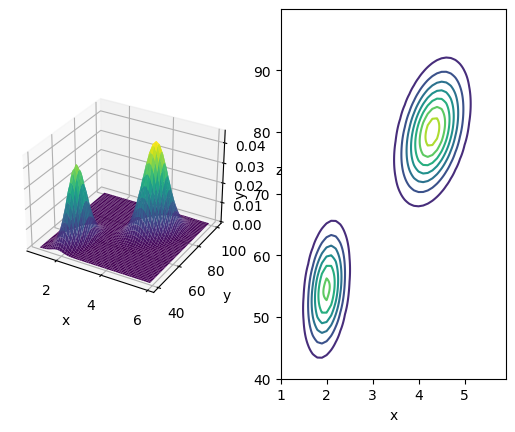

In [40]:
xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)
        
fig = plt.figure()
ax1 = fig.add_subplot(121, projection="3d")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.plot_surface(X, Y, Z, cmap="viridis")

ax2 = fig.add_subplot(122)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.contour(X, Y, Z)
plt.show()